In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
#This is for the simple test model
df = pd.read_csv('results.dat', sep='\t')
df

,Predators[],Prey[],Prey birth[],Predation[],Predator birth[],Predator death[],Unnamed: 6
0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.976582,1.106495,0.221299,0.108058,0.027015,0.048829,NaN
2,0.956420,1.227004,0.245401,0.117353,0.029338,0.047821,NaN
3,0.939680,1.363152,0.272630,0.128093,0.032023,0.046984,NaN
4,0.926579,1.516671,0.303334,0.140532,0.035133,0.046329,NaN
...,...,...,...,...,...,...,...
2188,3.036392,0.552238,0.110448,0.167681,0.041920,0.151820,NaN
2189,2.926502,0.500614,0.100123,0.146505,0.036626,0.146325,NaN
2190,2.817310,0.458819,0.091764,0.129263,0.032316,0.140865,NaN
2191,2.709641,0.425099,0.085020,0.115187,0.028797,0.135482,NaN


<AxesSubplot:>

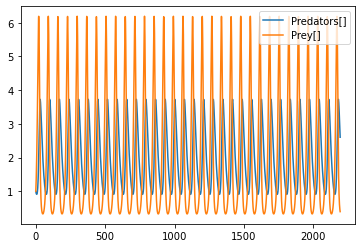

In [3]:
df = df[['Predators[]', 'Prey[]']]
df.plot()

In [4]:
prey_birth = 0.2
nomnom     = 0.1
pred_birth = 0.025
pred_death = 0.05

def ode_fun(t, y) :
    return [
        prey_birth*y[0] - nomnom*y[0]*y[1],
        pred_birth*y[0]*y[1] - pred_death*y[1]
    ]

n = len(df)
y0 = [1, 1]

In [5]:
%%time
sol = solve_ivp(ode_fun, [0, n-1], y0, t_eval=range(n), method='Radau')

Wall time: 364 ms


rmse err: 0.033853


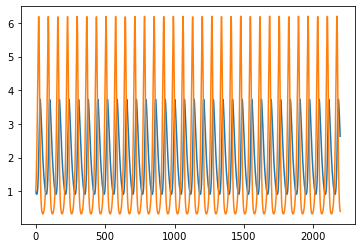

In [7]:
plt.plot(sol.t, sol.y[1,:], sol.t, sol.y[0,:])

print('rmse err: %f' % (np.sqrt(np.mean(np.square(sol.y[1,:]-df['Predators[]'])) + np.mean(np.square(sol.y[0,:]-df['Prey[]'])))))
